In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import nlp

pd.set_option('display.max_colwidth',None)

In [3]:
train_ds, val_ds, test_ds = nlp.load_dataset(
    'allocine',
split=['train', 'validation', 'test'])

In [4]:
type(train_ds)

nlp.arrow_dataset.Dataset

In [5]:
train_ds

Dataset(features: {'review': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['neg', 'pos'], names_file=None, id=None)}, num_rows: 160000)

In [6]:
train_ds['review'][0]

'Si vous cherchez du cinéma abrutissant à tous les étages,n\'ayant aucune peur du cliché en castagnettes et moralement douteux,"From Paris with love" est fait pour vous.Toutes les productions Besson,via sa filière EuropaCorp ont de quoi faire naître la moquerie.Paris y est encore une fois montrée comme une capitale exotique,mais attention si l\'on se dirige vers la banlieue,on y trouve tout plein d\'intégristes musulmans prêts à faire sauter le caisson d\'une ambassadrice américaine.Nauséeux.Alors on se dit qu\'on va au moins pouvoir apprécier la déconnade d\'un classique buddy-movie avec le jeune agent aux dents longues obligé de faire équipe avec un vieux lou complètement timbré.Mais d\'un côté,on a un Jonathan Rhys-meyers fayot au possible,et de l\'autre un John Travolta en total délire narcissico-badass,crâne rasé et bouc proéminent à l\'appui.Sinon,il n\'y a aucun scénario.Seulement,des poursuites débiles sur l\'autoroute,Travolta qui étale 10 mecs à l\'arme blanche en 8 mouvement

In [7]:
train_ds['label'][0]

0

In [8]:
MAX_NB_WORDS = 2000
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=MAX_NB_WORDS,
    lower= True,
    oov_token = '<unk>'
)
tokenizer.fit_on_texts(train_ds['review'])

word_index = tokenizer.word_index
vocab_size = len(word_index)
print('Number tokens uniques: {}'.format(vocab_size))

Number tokens uniques: 186308


In [9]:
train_reviews_tokenized = tokenizer.texts_to_sequences(train_ds['review'])
val_reviews_tokenized = tokenizer.texts_to_sequences(val_ds['review'])
test_reviews_tokenized = tokenizer.texts_to_sequences(test_ds['review'])

In [10]:
train_reviews_tokenized

[[45,
  68,
  1,
  17,
  77,
  1,
  7,
  80,
  9,
  1,
  1,
  249,
  439,
  17,
  1181,
  12,
  1,
  3,
  1,
  1,
  1,
  803,
  1,
  1856,
  10,
  40,
  20,
  68,
  254,
  9,
  1420,
  1,
  1,
  46,
  1,
  1,
  134,
  2,
  194,
  58,
  1,
  5,
  1,
  803,
  59,
  10,
  81,
  13,
  82,
  1,
  42,
  13,
  1,
  1,
  21,
  864,
  45,
  137,
  30,
  1,
  421,
  5,
  1,
  23,
  59,
  226,
  33,
  305,
  1,
  1,
  1,
  7,
  58,
  1,
  4,
  1,
  60,
  1,
  824,
  1,
  115,
  23,
  30,
  241,
  136,
  121,
  28,
  98,
  550,
  1314,
  5,
  1,
  54,
  291,
  1,
  685,
  27,
  4,
  164,
  1,
  69,
  1,
  1804,
  1,
  2,
  58,
  1809,
  27,
  6,
  531,
  1,
  306,
  1,
  21,
  54,
  198,
  23,
  22,
  6,
  1,
  1,
  1,
  1,
  28,
  432,
  3,
  2,
  503,
  6,
  371,
  1,
  12,
  987,
  1398,
  1,
  1,
  1,
  1,
  3,
  1,
  1,
  7,
  1,
  472,
  25,
  204,
  22,
  173,
  53,
  385,
  14,
  1,
  1,
  37,
  1,
  1,
  11,
  1,
  623,
  1,
  7,
  1,
  1999,
  12,
  1591,
  1815,
  48,
  235,
  36,
  1,


In [17]:
first_review=train_reviews_tokenized[0]
first_review[:15]

[45, 68, 1, 17, 77, 1, 7, 80, 9, 1, 1, 249, 439, 17, 1181]

In [18]:
index_to_word = dict((i,w) for w, i in tokenizer.word_index.items())
' '.join([index_to_word[i] for i in first_review[:15]])

'si vous <unk> du cinéma <unk> à tous les <unk> <unk> aucune peur du cliché'

In [21]:
reviews_len = [len(s) for s in train_reviews_tokenized + val_reviews_tokenized + test_reviews_tokenized]
print('Length avarage: {:1,f}'.format(np.mean(reviews_len)))
print('Length maximum: {}'.format(np.max(reviews_len)))

Length avarage: 91.479345
Length maximum: 389


C:\Users\ngois\AppData\Local\Temp\ipykernel_16544\1871616879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax  = sns.distplot(reviews_len, bins=150, kde = False, hist_kws = dict(alpha=0.8))


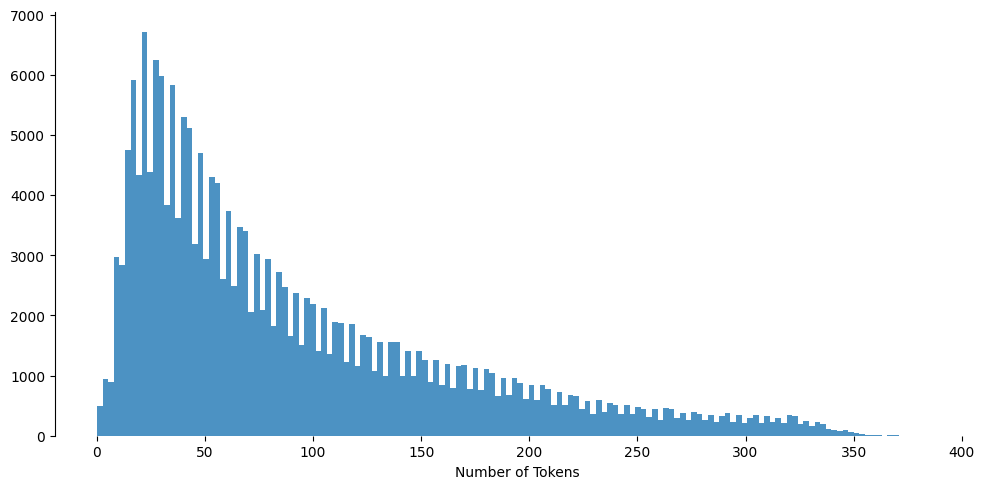

In [23]:
plt.figure(figsize=(10,5))
ax  = sns.distplot(reviews_len, bins=150, kde = False, hist_kws = dict(alpha=0.8))
ax.set(xlabel='Number of Tokens')

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [24]:
def remove_empty_sequences(reviews, labels):
    reviews_not_empty = []
    labels_not_empty = []
    removed = 0
    for x, y in zip(reviews, labels):
        if len(x) > 0:
            reviews_not_empty.append(x)
            labels_not_empty.append(y)
        else:
            removed += 1
    return reviews_not_empty, labels_not_empty

In [25]:
print('Delete {} sequences empty'.format(reviews_len.count(0)))

Delete 8 sequences empty


In [26]:
train_reviews_tokenized, train_labels = remove_empty_sequences(
    train_reviews_tokenized,
    train_ds['label'])
test_reviews_tokenized, test_labels = remove_empty_sequences(
    test_reviews_tokenized,
    test_ds['label'])
val_reviews_tokenized, val_labels = remove_empty_sequences(
    val_reviews_tokenized,
    val_ds['label'])

In [27]:
reviews_len = [len(s) for s in train_reviews_tokenized + val_reviews_tokenized + test_reviews_tokenized]
assert(reviews_len.count(0)==0)

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH_SEQ = 350

X_train = pad_sequences(
    train_reviews_tokenized,
    maxlen=MAX_LENGTH_SEQ,
    padding='post')

X_val = pad_sequences(
    val_reviews_tokenized,
    maxlen=MAX_LENGTH_SEQ,
    padding='post')

X_test = pad_sequences(
    test_reviews_tokenized,
    maxlen=MAX_LENGTH_SEQ,
    padding='post')

print('Dimension of tensor X_train:',X_train.shape)
print('Dimension of tensor X_val:',X_val.shape)
print('Dimension of tensor X_test:',X_test.shape)

Dimension of tensor X_train: (159993, 350)
Dimension of tensor X_val: (19999, 350)
Dimension of tensor X_test: (20000, 350)


In [30]:
y_train = np.array(train_labels)
y_val=np.array(val_labels)
y_test=np.array(test_labels)

In [32]:
embedding_layer = layers.Embedding(1000,5)

In [33]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[-0.00227534,  0.02568647,  0.01258862,  0.03506361,  0.02831156],
       [ 0.0314109 , -0.04214625,  0.00904709,  0.00651854,  0.03068973],
       [-0.00143801, -0.0483769 ,  0.0140012 ,  0.00959859,  0.04313742]],
      dtype=float32)>>

In [35]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

In [36]:
def create_model(embedding_dim=16, vocab_size=vocab_size):
    model = keras.Sequential([
        layers.Embedding(vocab_size,embedding_dim),
        layers.GlobalAveragePooling1D(),
        layers.Dense(embedding_dim, activation = 'relu'),
        layers.Dense(1)
    ])
    return model

In [37]:
model = create_model()

In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          2980928   
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2981217 (11.37 MB)
Trainable params: 2981217 (11.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=4,
    batch_size = 128,
    validation_steps=8)

Epoch 1/4
1250/1250 [==============================] - 44s 34ms/step - loss: 0.4417 - accuracy: 0.7448 - val_loss: 0.2722 - val_accuracy: 0.8945
Epoch 2/4
1250/1250 [==============================] - 40s 32ms/step - loss: 0.2633 - accuracy: 0.8895 - val_loss: 0.2475 - val_accuracy: 0.9043
Epoch 3/4
1250/1250 [==============================] - 41s 33ms/step - loss: 0.2467 - accuracy: 0.8970 - val_loss: 0.2411 - val_accuracy: 0.9141
Epoch 4/4
1250/1250 [==============================] - 48s 38ms/step - loss: 0.2413 - accuracy: 0.8993 - val_loss: 0.2379 - val_accuracy: 0.9189


In [41]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric],'')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend([metric,'val_'+metric])
    plt.show()

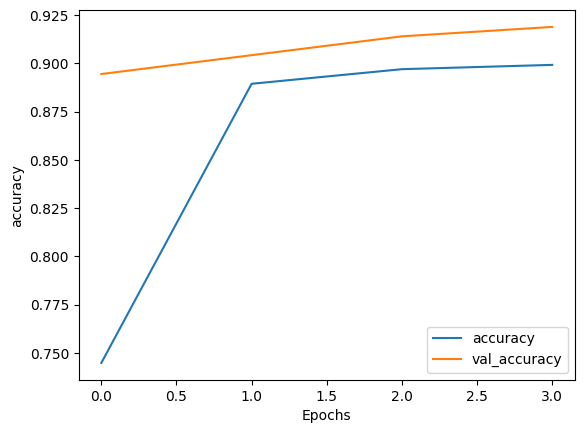

In [42]:
plot_graphs(history,'accuracy')

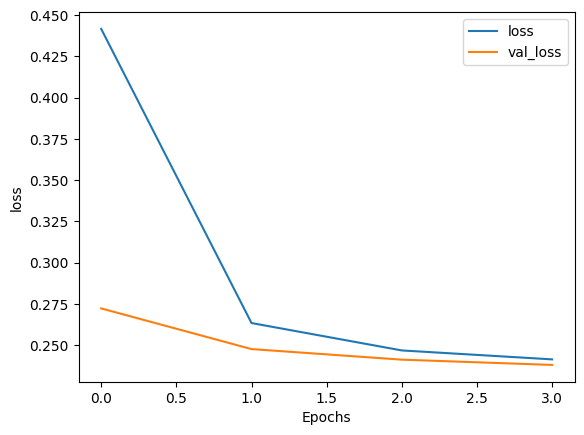

In [43]:
plot_graphs(history,'loss')

In [44]:
model.evaluate(X_test, y_test, verbose=False)

[0.23767846822738647, 0.9054499864578247]

In [46]:
e= model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(186308, 16)


In [48]:
import io

out_v = io.open('vectors.tsv','w', encoding='utf-8')
out_m = io.open('metadatas.tsv','w', encoding='utf-8')

for num, word in enumerate(tokenizer.word_index):
    vec = weights[num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')
    
out_m.close()
out_v.close()

In [50]:
def sample_predict(text):
    def prob(logit):
        return 1/(1+np.exp(-logit))
    
    text_tokenized = tokenizer.texts_to_sequences(text)
    text_tokenized = [i[0] for i in text_tokenized if i != []]
    text_tokenized = np.array(text_tokenized)
    text_tokenized = text_tokenized[:MAX_LENGTH_SEQ]
    
    while len(text_tokenized) < MAX_LENGTH_SEQ:
        text_tokenized = np.append(text_tokenized,0)
    text_tokenized = tf.expand_dims(text_tokenized,0)
    prediction = model.predict(text_tokenized)
    
    return prob(prediction)

In [53]:
text = 'J'ai deteste predre mon temps a regarder ce film'
sample_predict(text)

1/1 [==============================] - 0s 22ms/step


array([[0.4773845]], dtype=float32)

In [57]:
import os
model.save('model_allocine')
print(os.listdir('model_allocine'))

INFO:tensorflow:Assets written to: model_allocine\assets


INFO:tensorflow:Assets written to: model_allocine\assets


['assets', 'fingerprint.pb', 'keras_metadata.pb', 'saved_model.pb', 'variables']
